In [154]:
from sklearn.datasets import make_classification
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
raw_df = pd.read_csv('day_approach_maskedID_timeseries.csv')

convert_dict = {'nr. sessions': int } #convert nr.sessions to int 
raw_df = raw_df.astype(convert_dict)
raw_df.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [3]:
neg, pos = np.bincount(raw_df['injury'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 42766
    Positive: 583 (1.36% of total)



In [4]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Date')
cleaned_df.pop('Athlete ID')

0         0
1         0
2         0
3         0
4         0
         ..
42761    71
42762    71
42763    71
42764    71
42765    71
Name: Athlete ID, Length: 42766, dtype: int64

In [5]:
cleaned_df.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,injury
0,1,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0
1,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0
2,1,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0
3,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0
4,1,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,17.6,7.2,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0


In [6]:
y = cleaned_df['injury']
X = cleaned_df.drop('injury', axis=1)

In [7]:
X

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6
0,1,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,0.00,0.15
1,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,1.0,5.2,0.0,0.5,1.2,0.0,0.0,0.10,0.00,0.17
2,1,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
3,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.00,0.17
4,1,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,1.0,17.6,7.2,0.0,0.0,0.0,0.0,0.11,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42761,1,16.0,0.0,0.0,0.0,0.0,0.00,0.54,0.22,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
42762,0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
42763,1,10.0,0.0,0.0,0.0,0.0,0.00,0.94,0.88,0.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
42764,1,15.1,0.0,0.0,0.0,0.0,0.00,0.87,0.86,0.20,...,1.0,11.1,0.0,0.0,0.0,0.0,0.0,0.79,0.80,0.11


In [8]:
y

0        0
1        0
2        0
3        0
4        0
        ..
42761    1
42762    1
42763    1
42764    1
42765    1
Name: injury, Length: 42766, dtype: int64

In [9]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 42183, 1: 583})


In [10]:
#split train and test
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [373]:
#model definition
xgb_classifier = XGBClassifier(
    learning_rate =0.0009, 
    n_estimators=1000,

)

In [374]:
#generate weights to use on the XGBOOT, this is because the data is so imbalanced
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train_smt #provide your own target name
)

xgb_classifier.fit(X_train_smt, y_train_smt, sample_weight=sample_weights)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0009, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [375]:
# Performance on the train
auc = roc_auc_score(y_train_smt, xgb_classifier.predict(X_train_smt))
print("Performance sur le train : ", auc)

# Performance on the test
auc = roc_auc_score(y_test_smt, xgb_classifier.predict(X_test_smt))
print("Performance sur le test : ", auc)

Performance sur le train :  0.8527412997168523
Performance sur le test :  0.5498504261443811


In [376]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_smt, xgb_classifier.predict(X_test_smt)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  : ", acc_)
# Sensitivity : 
sens_ = tp / (tp + fn)
print("Sensitivity  : ", sens_)
# Specificity 
sp_ = tn / (tn + fp)
print("Specificity  : ", sens_)
# False positive rate (FPR)
FPR = fp / (tn + fp)
print("False positive rate  : ", FPR)

Error rate  :  0.1932190179267342
Accuracy  :  0.8067809820732658
Sensitivity  :  0.2857142857142857
Specificity  :  0.2857142857142857
False positive rate  :  0.1860134334255235


In [377]:
tn, fp, fn, tp = confusion_matrix(y_train_smt, xgb_classifier.predict(X_train_smt)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  on train set : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  on train set  : ", acc_)

tn, fp, fn, tp = confusion_matrix(y_test_smt, xgb_classifier.predict(X_test_smt)).ravel()
# Error rate : 
err_rate = (fp + fn) / (tp + tn + fn + fp)
print("Error rate  on test set : ", err_rate)
# Accuracy : 
acc_ = (tp + tn) / (tp + tn + fn + fp)
print("Accuracy  on test set  : ", acc_)

Error rate  on train set :  0.17844735435595938
Accuracy  on train set  :  0.8215526456440406
Error rate  on test set :  0.1932190179267342
Accuracy  on test set  :  0.8067809820732658


In [379]:
k = np.array(X_test_smt.iloc[700]).reshape(1,70)

In [380]:
xgb.predict(k)

array([0])

In [381]:
print(classification_report(y_test_smt,xgb_classifier.predict(X_test_smt)))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     12655
           1       0.02      0.29      0.04       175

    accuracy                           0.81     12830
   macro avg       0.50      0.55      0.47     12830
weighted avg       0.97      0.81      0.88     12830



In [382]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  10301
Legitimate Transactions Incorrectly Detected (False Positives):  2354
Fraudulent Transactions Missed (False Negatives):  125
Fraudulent Transactions Detected (True Positives):  50
Total Fraudulent Transactions:  175


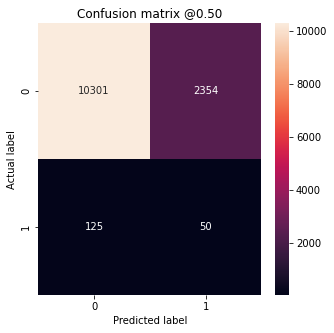

In [383]:
plot_cm(y_test_smt, xgb_classifier.predict(X_test_smt))

Save the model

In [386]:
import pickle
file_name = "xgb_model.pkl"

# save
pickle.dump(xgb, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
k = np.array(X_test_smt.iloc[700]).reshape(1,70)
xgb_model_loaded.predict(k)[0]

0